In [105]:
# Basic 

import os
import random
import re
import math
import time
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join

# Scikit-learn

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import roc_auc_score

# Deep Learning

from tqdm import tqdm
from tqdm.keras import TqdmCallback
import tensorflow as tf, re, math
import tensorflow.keras.backend as K
from tensorflow.keras.layers import *
import efficientnet.tfkeras as efn
from keras import layers
from keras.applications import DenseNet121
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam

# Visualization

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly
import plotly.express as px
from plotly.tools import FigureFactory as FF
from plotly.offline import iplot
import seaborn as sns
%matplotlib inline

# Misc

import streamlit as st
from PIL import Image
import cufflinks
import cv2 as cv
import warnings
warnings.filterwarnings('ignore')

In [106]:
# System
import cv2
import os, os.path
from PIL import Image              # from RBG to YCbCr
import gc
import time
import datetime

# Basics
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg    # to check images
# %matplotlib inline
from tqdm.notebook import tqdm      # beautiful progression bar

# SKlearn
from sklearn.model_selection import StratifiedKFold, GroupKFold
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

# PyTorch
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import FloatTensor, LongTensor
from torch.utils.data import Dataset, DataLoader, Subset
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Data Augmentation for Image Preprocessing
from albumentations import (ToFloat, Normalize, VerticalFlip, HorizontalFlip, Compose, Resize,
                            RandomBrightnessContrast, HueSaturationValue, Blur, GaussNoise,
                            Rotate, RandomResizedCrop, Cutout, ShiftScaleRotate)
from albumentations.pytorch import ToTensorV2, ToTensor

from efficientnet_pytorch import EfficientNet
from torchvision.models import resnet34, resnet50

import warnings
warnings.filterwarnings("ignore")

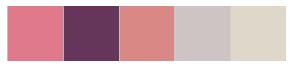

In [107]:
# Regular Imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from tabulate import tabulate
import missingno as msno 
from IPython.display import display_html
from PIL import Image
import gc
import cv2

import pydicom # for DICOM images
from skimage.transform import resize

# SKLearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings("ignore")

# Set Color Palettes for the notebook
colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']
sns.palplot(sns.color_palette(colors_nude))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

In [108]:
def set_seed(seed = 1234):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
set_seed()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Device available now:', device)

Device available now: cuda


In [109]:
# ----- STATICS -----
output_size = 1
# -------------------

In [110]:
# Directory
directory = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg'

# Import the 2 csv s
train_df = pd.read_csv(directory + '/train.csv')
test_df = pd.read_csv(directory + '/test.csv')

print('Train has {:,} rows and Test has {:,} rows.'.format(len(train_df), len(test_df)))

# Change columns names
new_names = ['dcm_name', 'ID', 'sex', 'age', 'anatomy', 'diagnosis', 'benign_malignant', 'target']
train_df.columns = new_names
test_df.columns = new_names[:5]

Train has 33,126 rows and Test has 10,982 rows.


In [111]:
df1_styler = train_df.head().style.set_table_attributes("style='display:inline'").set_caption('Head Train Data')
df2_styler = test_df.head().style.set_table_attributes("style='display:inline'").set_caption('Head Test Data')

display_html(df1_styler._repr_html_() + df2_styler._repr_html_(), raw=True)

Head Train Data dcm_name ID sex age anatomy diagnosis benign_malignant target 
 
 0 
 ISIC_2637011 
 IP_7279968 
 male 
 45.000000 
 head/neck 
 unknown 
 benign 
 0 
 
 
 1 
 ISIC_0015719 
 IP_3075186 
 female 
 45.000000 
 upper extremity 
 unknown 
 benign 
 0 
 
 
 2 
 ISIC_0052212 
 IP_2842074 
 female 
 50.000000 
 lower extremity 
 nevus 
 benign 
 0 
 
 
 3 
 ISIC_0068279 
 IP_6890425 
 female 
 45.000000 
 head/neck 
 unknown 
 benign 
 0 
 
 
 4 
 ISIC_0074268 
 IP_8723313 
 female 
 55.000000 
 upper extremity 
 unknown 
 benign 
 0 
 
 Head Test Data dcm_name ID sex age anatomy 
 
 0 
 ISIC_0052060 
 IP_3579794 
 male 
 70.000000 
 nan 
 
 
 1 
 ISIC_0052349 
 IP_7782715 
 male 
 40.000000 
 lower extremity 
 
 
 2 
 ISIC_0058510 
 IP_7960270 
 female 
 55.000000 
 torso 
 
 
 3 
 ISIC_0073313 
 IP_6375035 
 female 
 50.000000 
 torso 
 
 
 4 
 ISIC_0073502 
 IP_0589375 
 female 
 45.000000 
 lower extremity

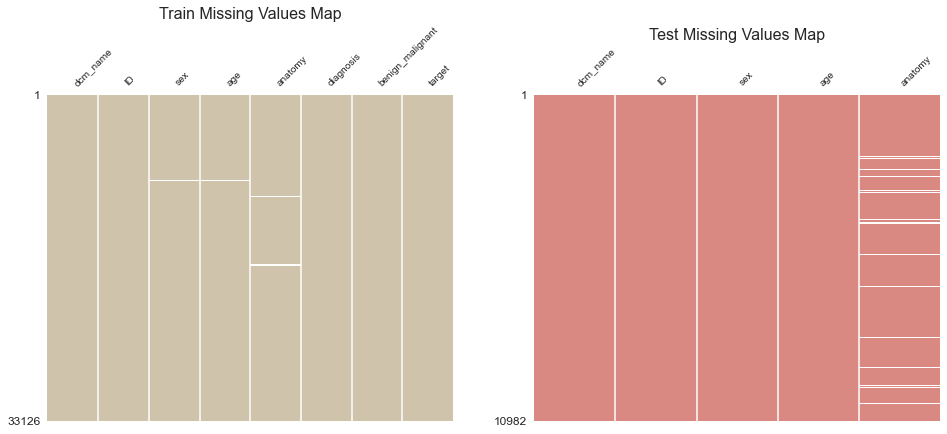

In [112]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

msno.matrix(train_df, ax = ax1, color=(207/255, 196/255, 171/255), fontsize=10)
msno.matrix(test_df, ax = ax2, color=(218/255, 136/255, 130/255), fontsize=10)

ax1.set_title('Train Missing Values Map', fontsize = 16)
ax2.set_title('Test Missing Values Map', fontsize = 16);

Out of 65 NAN values, 65 are benign and 0 malignant.


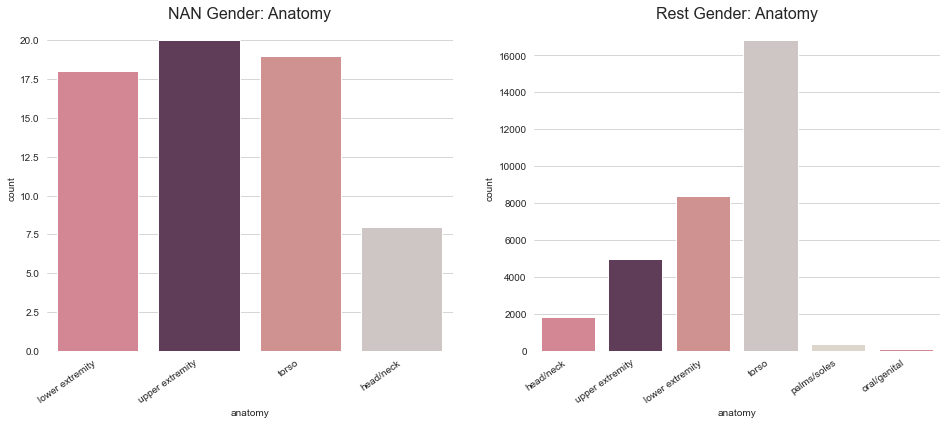

In [113]:
# Data
nan_sex = train_df[train_df['sex'].isna() == True]
is_sex = train_df[train_df['sex'].isna() == False]

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.countplot(nan_sex['anatomy'], ax = ax1, palette=colors_nude)
b = sns.countplot(is_sex['anatomy'], ax = ax2, palette=colors_nude)
ax1.set_title('NAN Gender: Anatomy', fontsize=16)
ax2.set_title('Rest Gender: Anatomy', fontsize=16)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

# Benign/ Malignant check
print('Out of 65 NAN values, {} are benign and 0 malignant.'.format(nan_sex['benign_malignant'].value_counts()[0]))

In [114]:
# Check how many are males and how many females
anatomy = ['lower extremity', 'upper extremity', 'torso']
train_df[(train_df['anatomy'].isin(anatomy)) & (train_df['target'] == 0)]['sex'].value_counts()

# Impute the missing values with male
train_df['sex'].fillna("male", inplace = True) 

Out of 68 NAN values, 68 are benign and 0 malignant.


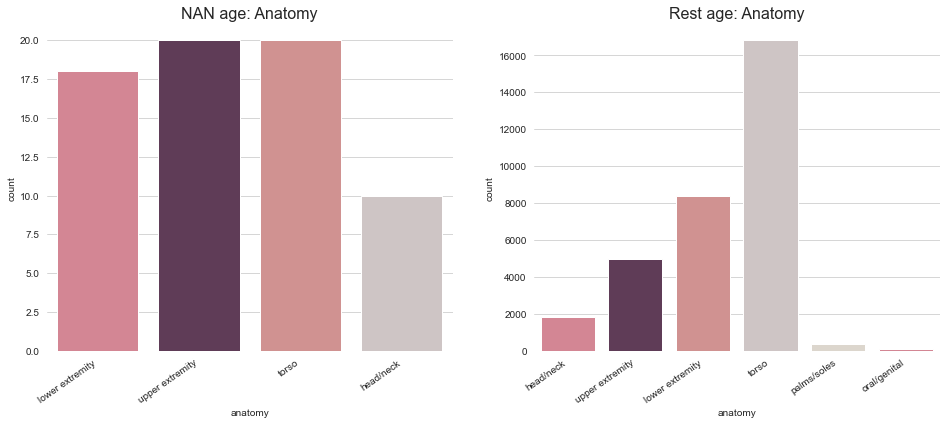

In [115]:
# Data
nan_age = train_df[train_df['age'].isna() == True]
is_age = train_df[train_df['age'].isna() == False]

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

a = sns.countplot(nan_age['anatomy'], ax = ax1, palette=colors_nude)
b = sns.countplot(is_age['anatomy'], ax = ax2, palette=colors_nude)
ax1.set_title('NAN age: Anatomy', fontsize=16)
ax2.set_title('Rest age: Anatomy', fontsize=16)

a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")
sns.despine(left=True, bottom=True);

# Benign/ Malignant check
print('Out of 68 NAN values, {} are benign and 0 malignant.'.format(nan_age['benign_malignant'].value_counts()[0]))

In [116]:
# Check the mean age
anatomy = ['lower extremity', 'upper extremity', 'torso']
median = train_df[(train_df['anatomy'].isin(anatomy)) & (train_df['target'] == 0) & (train_df['sex'] == 'male')]['age'].median()
print('Median is:', median)

# Impute the missing values with male
train_df['age'].fillna(median, inplace = True) 

Median is: 50.0


From all missing values, 518 are benign and 9 malignant.


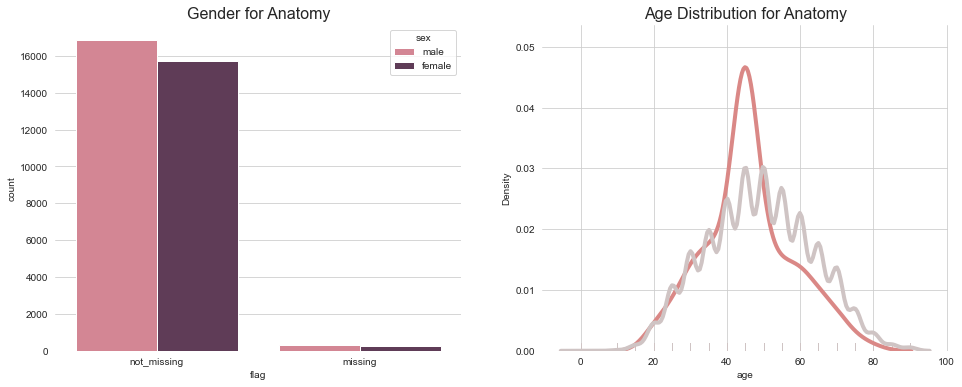

In [117]:
anatomy = train_df.copy()
anatomy['flag'] = np.where(train_df['anatomy'].isna()==True, 'missing', 'not_missing')

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

sns.countplot(anatomy['flag'], hue=anatomy['sex'], ax=ax1, palette=colors_nude)

sns.distplot(anatomy[anatomy['flag'] == 'missing']['age'], 
             hist=False, rug=True, label='Missing', ax=ax2, 
             color=colors_nude[2], kde_kws=dict(linewidth=4))
sns.distplot(anatomy[anatomy['flag'] == 'not_missing']['age'], 
             hist=False, rug=True, label='Not Missing', ax=ax2, 
             color=colors_nude[3], kde_kws=dict(linewidth=4))

ax1.set_title('Gender for Anatomy', fontsize=16)
ax2.set_title('Age Distribution for Anatomy', fontsize=16)
sns.despine(left=True, bottom=True);

# Benign - malignant
ben_mal = anatomy[anatomy['flag'] == 'missing']['benign_malignant'].value_counts()
print('From all missing values, {} are benign and {} malignant.'.format(ben_mal[0], ben_mal[1]))

In [118]:
# Impute for anatomy
train_df['anatomy'].fillna('torso', inplace = True) 

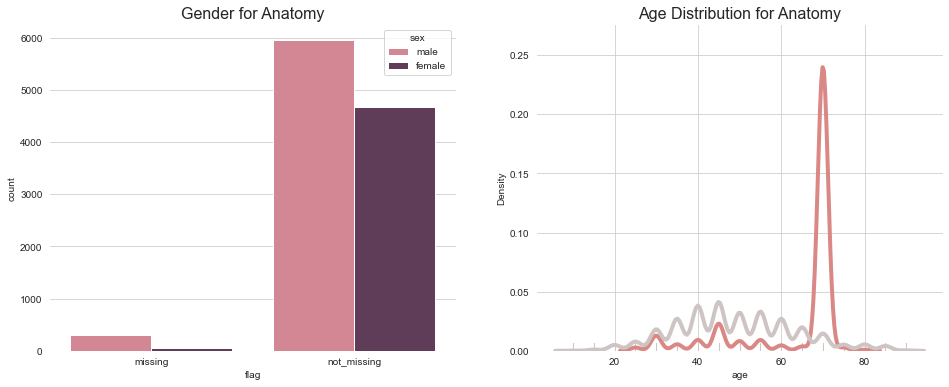

In [119]:
anatomy = test_df.copy()
anatomy['flag'] = np.where(test_df['anatomy'].isna()==True, 'missing', 'not_missing')

# Figure
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 6))

sns.countplot(anatomy['flag'], hue=anatomy['sex'], ax=ax1, palette=colors_nude)

sns.distplot(anatomy[anatomy['flag'] == 'missing']['age'],
             hist=False, rug=True, label='Missing', ax=ax2, 
             color=colors_nude[2], kde_kws=dict(linewidth=4, bw=0.1))

sns.distplot(anatomy[anatomy['flag'] == 'not_missing']['age'], 
             hist=False, rug=True, label='Not Missing', ax=ax2, 
             color=colors_nude[3], kde_kws=dict(linewidth=4, bw=0.1))

ax1.set_title('Gender for Anatomy', fontsize=16)
ax2.set_title('Age Distribution for Anatomy', fontsize=16)
sns.despine(left=True, bottom=True);

In [120]:
# Select most frequent anatomy for age 70
value = test_df[test_df['age'] == 70]['anatomy'].value_counts().reset_index()['index'][0]

# Impute the value
test_df['anatomy'].fillna(value, inplace = True) 

In [121]:
# Save the files
train_df.to_csv('train_clean.csv', index=False)
test_df.to_csv('test_clean.csv', index=False)

In [139]:
train_df['anatomy'].value_counts()

torso              17372
lower extremity     8417
upper extremity     4983
head/neck           1855
0                   1331
1                    880
3                    796
9                    724
7                    430
palms/soles          375
6                    201
4                    127
oral/genital         124
5                     19
2                     14
Name: anatomy, dtype: int64

In [122]:
# Setting file paths for our notebook:

base_path = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg'

train_img_path = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train'
train_images = [f for f in listdir(train_img_path) if isfile(join(train_img_path, f))]

test_img_path = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\test'
test_images = [f for f in listdir(test_img_path) if isfile(join(test_img_path, f))]

img_stats_path = r'C:\Users\HIMANSHU\Downloads\Melanoma Dataset'

In [123]:
# My Train: with imputed missing values + OHE
my_train = pd.read_csv(os.path.join(base_path, 'train_clean.csv'))

# Drop path columns and Diagnosis (it won't be available during TEST)
# We'll rewrite them once the data is concatenated
to_drop = ['path_dicom','path_jpeg', 'diagnosis']
for drop in to_drop:
    if drop in my_train.columns :
        my_train.drop([drop], axis=1, inplace=True)

# Roman's Train: with added data for Malignant category
roman_train = pd.read_csv(os.path.join(base_path, 'train_concat.csv'))


# --- Before concatenatenating both together, let's preprocess roman_train ---
# Replace NAN with 0 for patient_id
roman_train['patient_id'] = roman_train['patient_id'].fillna(0)

# OHE
to_encode = ['sex', 'anatom_site_general_challenge']
encoded_all = []

roman_train[to_encode[0]] = roman_train[to_encode[0]].astype(str)
roman_train[to_encode[1]] = roman_train[to_encode[1]].astype(str)

label_encoder = LabelEncoder()

for column in to_encode:
    encoded = label_encoder.fit_transform(roman_train[column])
    encoded_all.append(encoded)
    
roman_train[to_encode[0]] = encoded_all[0]
roman_train[to_encode[1]] = encoded_all[1]

In [132]:
my_train

for i in range(my_train.shape[0]):
    if my_train['sex'].iloc[i] == 'male':
        my_train['sex'].iloc[i] = 1
    else:
        my_train['sex'].iloc[i] = 0

In [136]:
my_train['anatomy'].value_counts()

torso              17372
lower extremity     8417
upper extremity     4983
head/neck           1855
palms/soles          375
oral/genital         124
Name: anatomy, dtype: int64

In [137]:
my_train

,dcm_name,ID,sex,age,anatomy,target
0,ISIC_2637011,IP_7279968,1,45.0,head/neck,0
1,ISIC_0015719,IP_3075186,0,45.0,upper extremity,0
2,ISIC_0052212,IP_2842074,0,50.0,lower extremity,0
3,ISIC_0068279,IP_6890425,0,45.0,head/neck,0
4,ISIC_0074268,IP_8723313,0,55.0,upper extremity,0
...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,1,50.0,torso,0
33122,ISIC_9999320,IP_3650745,1,65.0,torso,0
33123,ISIC_9999515,IP_2026598,1,20.0,lower extremity,0
33124,ISIC_9999666,IP_7702038,1,50.0,lower extremity,0


In [127]:
my_train.drop(columns=['benign_malignant'], inplace=True)

In [125]:
roman_train

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,target
0,ISIC_2637011,IP_7279968,1,45.0,1,0
1,ISIC_0015719,IP_3075186,0,45.0,9,0
2,ISIC_0052212,IP_2842074,0,50.0,3,0
3,ISIC_0068279,IP_6890425,0,45.0,1,0
4,ISIC_0074268,IP_8723313,0,55.0,9,0
...,...,...,...,...,...,...
37643,ISIC_0073231,BCN_0005418,0,55.0,0,1
37644,ISIC_0073237,BCN_0001536,0,45.0,3,1
37645,ISIC_0073238,BCN_0005240,0,45.0,9,1
37646,ISIC_0073241,BCN_0004405,1,60.0,6,1


In [134]:
# Give all columns the same name
roman_train.columns = my_train.columns


# --- Concatenate info which is not available in my_train ---
common_images = my_train['dcm_name'].unique()
new_data = roman_train[~roman_train['dcm_name'].isin(common_images)]

# Merge all together
train_df = pd.concat([my_train, new_data], axis=0)



# --- Read in Test data (also cleaned, imputed, OHE) ---
test_df = pd.read_csv(os.path.join(base_path, 'test_clean.csv'))

# Drop columns
for drop in to_drop:
    if drop in test_df.columns :
        test_df.drop([drop], axis=1, inplace=True)

# Create path column to image folder for both Train and Test
path_train = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\train'
path_test = r'C:\Users\HIMANSHU\Downloads\Melanoma jpg\test'

train_df['path_jpg'] = path_train + train_df['dcm_name'] + '.jpg'
test_df['path_jpg'] = path_test + test_df['dcm_name'] + '.jpg'


# --- Last final thing: NORMALIZE! ---
train_df['age'] = train_df['age'].fillna(-1)

normalized_train = preprocessing.normalize(train_df[['sex', 'age', 'anatomy']])
normalized_test = preprocessing.normalize(test_df[['sex', 'age', 'anatomy']])

train_df['sex'] = normalized_train[:, 0]
train_df['age'] = normalized_train[:, 1]
train_df['anatomy'] = normalized_train[:, 2]

test_df['sex'] = normalized_test[:, 0]
test_df['age'] = normalized_test[:, 1]
test_df['anatomy'] = normalized_test[:, 2]


print('Len Train: {:,}'.format(len(train_df)), '\n' +
      'Len Test: {:,}'.format(len(test_df)))

# Yay!

ValueError: could not convert string to float: 'head/neck'

In [140]:
# ----- STATICS -----
vertical_flip = 0.5
horizontal_flip = 0.5

csv_columns = ['sex', 'age', 'anatomy']
no_columns = 3
# ------------------

In [141]:
class MelanomaDataset(Dataset):
    
    def __init__(self, dataframe, vertical_flip, horizontal_flip,
                 is_train=True, is_valid=False, is_test=False):
        self.dataframe, self.is_train, self.is_valid = dataframe, is_train, is_valid
        self.vertical_flip, self.horizontal_flip = vertical_flip, horizontal_flip
        
        # Data Augmentation (custom for each dataset type)
        if is_train or is_test:
            self.transform = Compose([RandomResizedCrop(height=224, width=224, scale=(0.4, 1.0)),
                                      ShiftScaleRotate(rotate_limit=90, scale_limit = [0.8, 1.2]),
                                      HorizontalFlip(p = self.horizontal_flip),
                                      VerticalFlip(p = self.vertical_flip),
                                      HueSaturationValue(sat_shift_limit=[0.7, 1.3], 
                                                         hue_shift_limit=[-0.1, 0.1]),
                                      RandomBrightnessContrast(brightness_limit=[0.7, 1.3],
                                                               contrast_limit= [0.7, 1.3]),
                                      Normalize(),
                                      ToTensor()])
        else:
            self.transform = Compose([Normalize(),
                                      ToTensor()])
            
    def __len__(self):
        return len(self.dataframe)
    
    def __getitem__(self, index):
        # Select path and read image
        image_path = self.dataframe['path_jpg'][index]
        image = cv2.imread(image_path)
        # For this image also import .csv information (sex, age, anatomy)
        csv_data = np.array(self.dataframe.iloc[index][['sex', 'age', 'anatomy']].values, 
                            dtype=np.float32)
        
        # Apply transforms
        image = self.transform(image=image)
        # Extract image from dictionary
        image = image['image']
        
        # If train/valid: image + class | If test: only image
        if self.is_train or self.is_valid:
            return (image, csv_data), self.dataframe['target'][index]
        else:
            return (image, csv_data)

In [142]:
class ResNet50Network(nn.Module):
    def __init__(self, output_size, no_columns):
        super().__init__()
        self.no_columns, self.output_size = no_columns, output_size
        
        # Define Feature part (IMAGE)
        self.features = resnet50(pretrained=True) # 1000 neurons out
        # (CSV data)
        self.csv = nn.Sequential(nn.Linear(self.no_columns, 500),
                                 nn.BatchNorm1d(500),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.2))
        
        # Define Classification part
        self.classification = nn.Linear(1000 + 500, output_size)
        
        
    def forward(self, image, csv_data, prints=False):
        
        if prints: print('Input Image shape:', image.shape, '\n'+
                         'Input csv_data shape:', csv_data.shape)
        
        # Image CNN
        image = self.features(image)
        if prints: print('Features Image shape:', image.shape)
        
        # CSV FNN
        csv_data = self.csv(csv_data)
        if prints: print('CSV Data:', csv_data.shape)
            
        # Concatenate layers from image with layers from csv_data
        image_csv_data = torch.cat((image, csv_data), dim=1)
        
        # CLASSIF
        out = self.classification(image_csv_data)
        if prints: print('Out shape:', out.shape)
        
        return out

In [144]:
model_example = ResNet50Network(output_size=output_size, no_columns=no_columns)

In [145]:
# Data object and Loader
example_data = MelanomaDataset(train_df, vertical_flip=0.5, horizontal_flip=0.5, 
                               is_train=True, is_valid=False, is_test=False)
example_loader = torch.utils.data.DataLoader(example_data, batch_size = 3, shuffle=True)

# Get a sample
for (image, csv_data), labels in example_loader:
    image_example, csv_data_example = image, csv_data
    labels_example = torch.tensor(labels, dtype=torch.float32)
    break
print('Data shape:', image_example.shape, '| \n' , csv_data_example)
print('Label:', labels_example, '\n')

# Outputs
out = model_example(image_example, csv_data_example, prints=True)

# Criterion example
criterion_example = nn.BCEWithLogitsLoss()
# Unsqueeze(1) from shape=[3] to shape=[3, 1]
loss = criterion_example(out, labels_example.unsqueeze(1))   
print('Loss:', loss.item())

ValueError: could not convert string to float: 'upper extremity'

In [ ]:
class EfficientNetwork(nn.Module):
    def __init__(self, output_size, no_columns, b4=False, b2=False):
        super().__init__()
        self.b4, self.b2, self.no_columns = b4, b2, no_columns
        
        # Define Feature part (IMAGE)
        if b4:
            self.features = EfficientNet.from_pretrained('efficientnet-b4')
        elif b2:
            self.features = EfficientNet.from_pretrained('efficientnet-b2')
        else:
            self.features = EfficientNet.from_pretrained('efficientnet-b7')
        
        # (CSV)
        self.csv = nn.Sequential(nn.Linear(self.no_columns, 250),
                                 nn.BatchNorm1d(250),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.2),
                                 
                                 nn.Linear(250, 250),
                                 nn.BatchNorm1d(250),
                                 nn.ReLU(),
                                 nn.Dropout(p=0.2))
        
        # Define Classification part
        if b4:
            self.classification = nn.Sequential(nn.Linear(1792 + 250, output_size))
        elif b2:
            self.classification = nn.Sequential(nn.Linear(1408 + 250, output_size))
        else:
            self.classification = nn.Sequential(nn.Linear(2560 + 250, output_size))
        
        
    def forward(self, image, csv_data, prints=False):    
        
        if prints: print('Input Image shape:', image.shape, '\n'+
                         'Input csv_data shape:', csv_data.shape)
        
        # IMAGE CNN
        image = self.features.extract_features(image)
        if prints: print('Features Image shape:', image.shape)
            
        if self.b4:
            image = F.avg_pool2d(image, image.size()[2:]).reshape(-1, 1792)
        elif self.b2:
            image = F.avg_pool2d(image, image.size()[2:]).reshape(-1, 1408)
        else:
            image = F.avg_pool2d(image, image.size()[2:]).reshape(-1, 2560)
        if prints: print('Image Reshaped shape:', image.shape)
            
        # CSV FNN
        csv_data = self.csv(csv_data)
        if prints: print('CSV Data:', csv_data.shape)
            
        # Concatenate
        image_csv_data = torch.cat((image, csv_data), dim=1)
        
        # CLASSIF
        out = self.classification(image_csv_data)
        if prints: print('Out shape:', out.shape)
        
        return out

In [ ]:
# Create an example model - Effnet
model_example = EfficientNetwork(output_size=output_size, no_columns=no_columns,
                                 b4=False, b2=True)

In [ ]:
# Data object and Loader
example_data = MelanomaDataset(train_df, vertical_flip=0.5, horizontal_flip=0.5, 
                               is_train=True, is_valid=False, is_test=False)
example_loader = torch.utils.data.DataLoader(example_data, batch_size = 3, shuffle=True)

# Get a sample
for (image, csv_data), labels in example_loader:
    image_example, csv_data_example = image, csv_data
    labels_example = torch.tensor(labels, dtype=torch.float32)
    break
print('Data shape:', image_example.shape, '| \n' , csv_data_example)
print('Label:', labels_example, '\n')

# Outputs
out = model_example(image_example, csv_data_example, prints=True)

# Criterion example
criterion_example = nn.BCEWithLogitsLoss()
# Unsqueeze(1) from shape=[3] to shape=[3, 1]
loss = criterion_example(out, labels_example.unsqueeze(1))   
print('Loss:', loss.item())